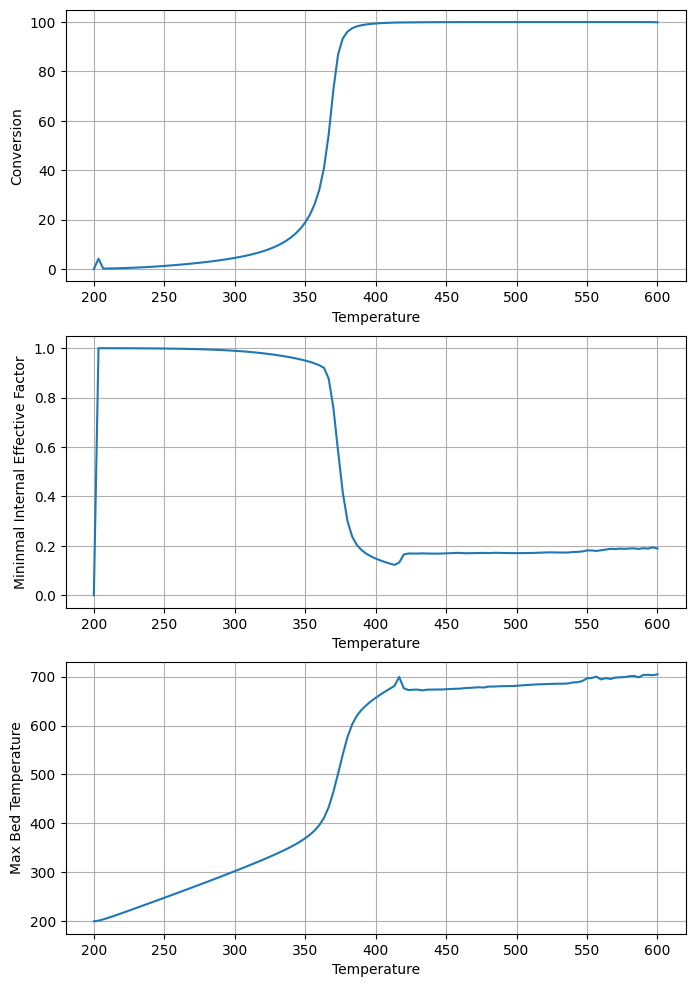

In [5]:
import pandas as pd
import itertools
import re
import json
import numpy as np
import matplotlib.pyplot as plt


def read_and_parse_input_file(input_file):
    with open(input_file) as f:
        header_row = next(itertools.islice(f, 2, 3))
        header_names = re.findall('"([^"]+)"', header_row)

    def parse_header(name):
        return name.replace('-', '_').lower()

    df = pd.read_csv(input_file, sep='\s+', skiprows=3, header=None, names=[parse_header(name) for name in header_names])
    df = df.fillna(0)

    return df


def df_to_json_file(df, json_file):
    data = {}
    for col in df.columns:
        data[col] = df[col].values.tolist()

    with open(json_file, 'w') as f:
        json.dump(data, f)


def json_to_dict(json_file):
    with open(json_file) as f:
        data = json.load(f)

    result = {}
    for key, value in data.items():
        if isinstance(value, list):
            result[key] = np.array(value)
        elif isinstance(value, dict):
            result[key] = json_to_dict(value)
        else:
            result[key] = value

    return result


def plot_data(df):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

    x = df['temperature_setpoint'] - 273.15

    y1 = df['conversion']
    ax1.plot(x, y1)
    ax1.grid()
    ax1.set_xlabel('Temperature')
    ax1.set_ylabel('Conversion')

    y2 = df['min_ef_internal']
    ax2.plot(x, y2)
    ax2.grid()
    ax2.set_xlabel('Temperature')
    ax2.set_ylabel('Mininmal Internal Effective Factor')

    y3 = df['max_bed_temperature'] - 273.15
    ax3.plot(x, y3)
    ax3.grid()
    ax3.set_xlabel('Temperature')
    ax3.set_ylabel('Max Bed Temperature')

    plt.show()

input_file = './catalyst_test_reactor-monitor.out'
json_file = 'result.json'

df = read_and_parse_input_file(input_file)
df_to_json_file(df, json_file)
result_dict = json_to_dict(json_file)
plot_data(df)


